In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('Data/train.csv') # Loads in the training data
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
---
<br>

# **Introduction**
I started constructing this notebook after stumbling upon a video made by Samson Zhang. He explained how learning the foundational concepts of a neural network without the assistance of popular libraries/frameworks such as TensorFlow, PyTorch, and Keras enabled him to gain a more thorough understanding of machine learning. As I tried to understand what was happening in the code, I was taken down rabit hole after rabit hole searching YouTube and forums for the explanations. That's when I decided to organize everything I was learning.

Since this notebook elaborates on concepts that I did not initially grasp, some of its contents may be quite easy to understand, while others that I did not cover in-depth may be challenging. In such cases, I challenge you to learn using the many available resources. This notebook is tailored towards someone with a surface-level understanding of calculus, linear algebra, and python. Anyone who meets those requirements should be able to follow along and understand this simple neural network using the MNIST digits dataset!

This notebook was inspired by and modeled after one created by Samson Zhang, found [here](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook). I have added additional features and made some modifications to improve performance. Notably, I have significantly expanded on and edited the accompanying text to increase clarity.

The MNIST dataset is from Kaggle, found [here](]https://www.kaggle.com/c/digit-recognizer)
<br>
<br>

---
---
<br>

## **Resource Recommendations**
Here are some of the resources I have found the most helpful. Some have unique styles, or are a part of a longer series, so find the one that most suits you!
<br>
<br>

---
<br>

### **Machine Learning/Neural Networks**
["Why Neural Networks can learn (almost) anything"](https://www.youtube.com/watch?v=0QczhVg5HaI) - Emergent Garden

[Neural Networks (Series)](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - 3Blue1Brown

[Neural Networks/Deep Learning (Series)](https://www.youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1) - StatQuest with Josh Starmer

[Machine Learning (Series)](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF) - StatQuest with Josh Starmer
<br>
<br>

### **Mathematics**
[Essence of Linear Algebra (Series)](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) - 3Blue1Brown

[Essence of Calculus (Series)](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr) - 3Blue1Brown
<br>
<br>

---
---
<br>

# **Definitions**
These are some definitions that are either helpful to have as a reference or not covered in this notebook.

*All terms are described in the context of machine learning and neural networks. In other applications, these definitions may differ.*
<br>
<br>

---
<br>

## **Arrays**
The dimensionality of an array in the context of data structures can be different from the dimensionality of the space it's used to represent. For example, a "2-D vector" is a 1-D collection of 2 values that represents a point or direction in two-dimensional space. Additionally, a "1-D Matrix" is considered a vector. The dimensionality of the data structures never changes, but the dimensionality of its contents can.

**Scalar**
0-Dimensional single, real or complex number.

**Vector**
1-Dimensional array of numbers that can be represented as either a row or a column.

**Matrix**
2-Dimensional array of numbers where each row or column represents an array.

**Tensor**
N-Dimensional array of numbers, known as "N-Order" tensor. Scalars (0-D tensors), vectors (1-D tensors), and matrices (2-D tensors) are specific types of tensors.

<br>
<img src="Images/Arrays.jpeg" alt="Arrays" width="1200">

Image source: Jovian.com
<br>
<br>

---
<br>

## **Components**
**Training Set**
Usually the largest set in a given dataset that is used to train the model and adjust parameters.

**Validation Set**
Also known as the "dev set", this is a subset of the training set that is used to evaluate performance and tune hyperparameters.

**Testing Set**
A set used to assess the final performance and generalization capability of a model. It is kept separate from the training and validation sets and unseen to the model to ensure uninfluenced decisions.

**Node/Neuron**
The fundamental of a neural network that takes inputs, applies weights and biases, performs computations, and produces outputs.

**Regularization Strength**
A value used to prevent overfitting that adds a penalty to the loss function to encourage simpler representations. If it's set too high, it could lead to underfitting and poor results. If it's set too low, it could lead to overfitting and poor results.
<br>
<br>

---
<br>

## **Miscellaneous**
**Overfitting**
A scenario that occurs when a model is overly complex, which leads to the model learning randomness and not underlying patterns. It will have good performance on training data at the expense of good performance on the testing data.

**Underfitting**
A scenario that occurs when a model is not complex enough, which leads to the model developing little capacity to capture patterns. It will have poor performance on both the training and testing sets.
<br>
<br>

---
---
<br>

# **Overview**
The data we'll be working with is the MNIST dataset. It consists of tens of thousands handwritten images of digits. Thankfully, we don't have to worry about image processing because the images have been converted into values inside a .csv file. Each "image" now consists of a 28x28 grid of values (784 total), which has been transformed into a one-dimensional array. Each value is on a scale from 0 to 255, with 0 being completely black and 255 being completely white. By dividing these values by 255, we can normalize them to be on a scale from 0 to 1.

<br>
<img src="Images/Digits_Example.jpeg" alt="Digits Example" width="1200">

Image source: medium.com
<br>

The dataset is split into two files: the training data and the testing data. The training data is much larger than the testing data because our model will need a lot of information to try to correctly identify the handwritten digits in the testing data. These two datasets are completely disconnected from each other. The testing data will only be introduced to the model after we are completely done with training. From there, the model no longer updates its parameters, and it remains the same throughout the testing data.

There is one important distinction between the training and testing data, however. Each image in the training data is accompanied by a label that represents what digit that image represents. Therefore, each array of image data in the training data is actually 785 values (we'll separate the labels from each vector later). Now, we have tens of thousands arrays of length 785 to run through our model!

This network will have three total layers: an input layer, a hidden layer, and an output layer.

<br>
<img src="Images/Network_Layers.jpeg" alt="Network Layers" width="1200">

Image source: medium.com
<br>
<br>

---
---
<br>

## **Data Handling**
Since each image is represented by a vector with 784 values, and we have tens of thousands of images, performing operations on these images would require a large amount of computational power. Thankfully, we can take advantage of vectorized calculations by stacking the vectors together into one matrix to increase efficiency. Vectorized calculations involve performing operations on entire arrays rather than individual elements, which significantly speeds up computation time. Some examples of vectorized calculations we'll implement are dot products, matrix multiplication, and element-wise operations.

In most applications, these vectors would be represented as rows of the matrix with dimensions $m \times n$ where $m$ is the number of training examples and $n$ is the number of input features (784). In linear algebra, $m$ refers to the number of rows and $n$ refers to the number of columns. Another alteration we're going to make to our data is transposing it. This is common practice in machine learning because it allows our data to adhere to the conventions of linear algebra and also specific algorithms. Now, our matrix will have dimensions $n \times m$, with each column corresponding to a training example and each row a training feature. A transposed matrix is denoted by the addition of a superscripted $T$.

<br>
<img src="Images/Transpose.jpeg" alt="Transpose" width="1200">

Image source: cuemath.com
<br>
<br>

---
<br>

## **Input Layer**
The input layer is the very first layer of our neural network. Essentially, this layer's only purpose is to represent the input data, or input features. This layer is often disregarded when counting how many layers a network has, so ours would only be a two-layer neural network.

Throughout the entire process of training our model, this layer will always have 784 nodes, or neurons. You can think of these as a unit of the neural network that holds and processes data. Individually, nodes don't do much. When you connect them to other nodes and apply functions to them however, that's how we make a neural network.
<br>
<br>

---
<br>

## **Hidden Layer**

The hidden layer is the first layer of our network that performs some action on the data. The amount of nodes in any hidden layer is arbitrary, it's entirely up to you how many you want to incorporate. You can increase or decrease the amount as much as you like depending on the performance of the model. In fact, most neural networks have multiple hidden layers, but we're using one to keep things simple.

Since no values are associated with the nodes in the hidden layer, now we have to perform some operation on the data. We're now going to introduce weights and biases to our model, each of which starts off as completely randomized values. These two parameters are the primary parameters that are updated during the training process.

We're also going to apply an activation function to the values associated with the hidden layer. The choice of activation function is another element of a neural network that can be altered. For this, we're going to use what's called a rectified linear unit (ReLU) activation function. ReLU will take in  "weighted sums", "pre-activation values", "logits" and perform an operation on each of those to return "activations", or "activation values".

After ReLU is has been used, these values are ready to move onto the next layer.
<br>
<br>

---
<br>

## **Output Layer**

Our output layer will have 10 nodes, one for each possible digit. We will introduce another set of weights and biases connecting the hidden layer to the output layer. Once again, we will apply an activation function to the pre-activation values specific to this layer. However, the output layer is going to use a different one than ReLU called a softmax function.

A softmax function will transform our pre-activation values into an array of probabilities that sums up very nicely to 1. Essentially, each probability value of the output layer represents how confident the model is that a certain image is a particular digit. Now, we have our final output.
<br>
<br>

---
---

In [2]:
"""
Dataset Initialization

m: rows
n: columns
"""
data = np.array(data)
m, n = data.shape # Assigns dimension values to m and n
np.random.shuffle(data) # Shuffles the data to prevent overfitting

"""
Validation Dataset Initialization

X: Input features of the validation dataset that are used to make predictions
Y: Target variables of the validation dataset that are the expected output of the input data
"""
validation_data = data[0:1000].T # Grabs the first 1000 columns of the dataset
Y_validation = validation_data[0] # Creates a vector of the target variables, or "correct digits"
X_validation = validation_data[1:, :]
X_validation= X_validation / 255.0

"""
Training Dataset Initialization

X: Input features of the training dataset that are used to make predictions
Y: Target variables of the training dataset that are the expected output of the input data
"""
training_data = data[1000:m].T
Y_training = training_data[0]
X_training = training_data[1:n]
X_training = X_training / 255.0
_,m_training = X_training.shape # Retrieves the size of X_training and assigns the amount of columns to m_training because the amount is not initially known, unlike in validation_data

---
---
<br>

# **Transposing**
It may be quite confusing to visualize why we transposed matrices and how transposing actually works. In order to clear some potential confusion, we'll work through an example very similar to the operations that were just performed in the above code. Note, $y_i$ will be used to represent the true labels of our training data (the ones we separated from the rest). This notation will be expanded on in the future, but I thought it would help increase clarity.

This is a matrix $A$ representing the training data, with 5 rows and 3 columns:
$$A = \begin{bmatrix}
{y}_0 & 1 & 2 \\
{y}_1 & 3 & 4 \\
{y}_2 & 5 & 6 \\
{y}_3 & 7 & 8 \\
{y}_4 & 9 & 10
\end{bmatrix}$$

For our validation data $B$, extract the first 2 rows and transpose the result as $B^{T}$. We'll use validation_data = data[0:2].T:

$$B = \begin{bmatrix}
{y}_0 & 1 & 2 \\
{y}_1 & 3 & 4
\end{bmatrix}$$

$$B^{T} = \begin{bmatrix}
{y}_0 & {y}_1 \\
1 & 3 \\
2 & 4
\end{bmatrix}$$

Next, retrieve the true label vector $B_{Y}$ and then the input features matrix $B_{X}$. We'll use Y_validation = validation_data[0] and X_validation = validation_data[1:3]:

$$B^{T}_{Y} = \begin{bmatrix}
{y}_0 & {y}_1 \\
\end{bmatrix}$$

$$B^{T}_{X} = \begin{bmatrix}
1 & 3 \\
2 & 4
\end{bmatrix}$$

As you can see, we've separated the true labels from the data array. Now, we can use the true labels later on when we need to inform the model on whether or not it correctly predicted the digit.
<br>
<br>

---
---
<br>

# **Parameters**
Recall, the layers of our neural network are 0-indexed where the current layer is represented by $k$. The weight matrices and bias vectors utilize this notation.

As mentioned previously, weights and biases are the primary parameters that are adjusted by the model.

Every node in the input layer has a weight value connecting to every node in the hidden layer (that's a lot of connections!). This is where the "network" part of neural network is emphasized.
<br>
<br>

---
---
<br>

## **Weight**
Weights are learnable parameters that determine the strength of the connections between nodes in adjacent layers. Each weight value in the matrix influences the contribution, or importance, of the connection between a node in the previous layer $k-1$ to a node in the current layer $k$. These values are used to calculate the pre-activation values.

$$W^{[k]} = \begin{bmatrix}
w_{0,0} & w_{0,1} & \dots & w_{0,n} \\
w_{1,0} & w_{1,1} & \dots & w_{1,n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m,0} & w_{m,1} & \dots & w_{m,n}
\end{bmatrix}$$

Each row of $W^{[k]}$ represents the connections between all nodes of the previous layer $k-1$ to a particular node in the current layer $k$, while each column of $W^{[k]}$ represents the connections between a particular node of the previous layer $k-1$ to all nodes in the current layer $k$.

The weight $w_{m,n}$ represents the weight value for the connection from the $n-th$ node in the previous layer $k-1$ to the $m-th$ node in the current layer $k$. In the first weight matrix $W^{[1]}$, $m=10$ and $n=784$ which results in a matrix with 7,840 elements. In the second weight matrix $W^{[2]}$, $m=10$ and $n=10$ which results in a matrix with 100 elements. Note, $m$ and $n$ are serving two purposes in this context. In $W^{[k]}$, $m$ represents both the row index and the amount of rows, while $n$ represents both the column index and the amount of columns. $W^{[k]}$ is of size $m \times n$.
<br>
<br>

---
<br>

## **Bias**
Biases are a set of learnable parameters that are added to thw pre-activation values, just before applying an activation function. Bias is used to shift the axis of an activation function to ensure certain input values (especially those will a value of 0, which can still be helpful information to guide the model) don't get cut off when calculating predictions. It also ensures that all variations of input values are captured. For example, a digit shifting to the left will still be identified by the model, even though it's in an entirely different position than it was previously.

$$b^{[k]} = \begin{bmatrix}
b_0  \\
b_1  \\
\vdots  \\
b_n
\end{bmatrix}$$

The bias $b_n$ represents the bias value of the $n-th$ node in the current layer $k$.

Both bias vectors in our neural network, $b^{[1]}$ and $b^{[2]}$, contain 10 elements, one for each node in their respective layers.

<br>
<img src="Images/Bias_ReLU.jpeg" alt="Bias and ReLU" width="1200">

Image source: turing.com
<br>
<br>

---
---

In [3]:
def initialize_parameters():
    """
    Initializes the weight (m, n) and bias (m, 1) arrays with random values between 0 and 1. Then, To center the distribution around 0, 0.5 is subtracted

    m=neurons in current layer
    n=neurons in previous layer

    Returns:
        W1: Matrix of randomized weight values for the input features to the hidden layer
        b1: (Vector of randomized bias values for the input layer to the hidden layer
        W2: Matrix of randomized weight values for the hidden layer to the output layer
        b2: Vector of randomized bias values for the hidden layer to the output layer
    """
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

---
---
<br>

# **Layer Operations**
This is where we actually start getting into what calculations happen in our network! It's relatively simple, but there are a lot of moving parts, so ensure you understand each before moving on.
<br>
<br>

---
---
<br>

## **Pre-Activation Values**
Pre-activation values, also called weighted sums, are calculated by computing the dot product of a weight matrix $W^{[k]}$ and input values $X$ or $A^{[1]}$, depending on which layer the pre-activation values are calculated, plus a bias value $b^{[k]}$. In our network, each set of pre-activation values results in a vector with 10 elements, equal to the amount of nodes in each layer.

<br>
<img src="Images/Dot_Product.jpeg" alt="Dot Product" width="1200">

Image source: algebra1course.wordpress.com
<br>

*Note, the term "input values" generally refers to values that are used as an input to a function (in this case, our pre-activation values calculation). It's different from the term "input features", which exclusively refers to the values in the input layer that represent the image data from our dataset.*
<br>
<br>

---
<br>

## **Activation Values**
As the name might suggest, these are the values obtained after applying an activation function, and the final operation performed in their respective layer. Before we demonstrate how this is done, we need to provide the activation functions we'll be using in this neural network.
<br>
<br>

### **ReLU**
Rectified Linear Unit (ReLU) is an activation function that returns the input value $x$ if $x>0$, and zero otherwise. ReLU introduces non-linearity to the network, allowing it to learn and represent complex relationships between inputs and outputs.

ReLU function:
$$f(x) = max(0, x)$$

<br>
<img src="Images/ReLU.jpeg" alt="ReLU" width="1200">

Image source: vidyasheela.com
<br>
<br>

### **Softmax**
The softmax function transforms a vector $Z$ into a probability distribution. Each element in the output vector represents the probability of the input belonging to a particular class. The output vector is one whose elements sum up to 1 and are all non-negative (these are really important properties).

Softmax function:
$$\hat{y}_i = \frac{e^{Z_i}}{\sum_{j=0}^{C-1} {e^{Z_j}}}$$

In this, ${Z_i}$ represents the input vector of pre-activation values, ${e^{Z_i}}$ represents a particular node, $e^{Z_j}$ represents all nodes and $C$ represents the amount of classes. The numerator raises $e$ to the power of some value $Z_i$ of the input vector. The denominator raises $e$ to the power of each $Z_j$, which is $C$ classes, and then sums up all these terms.

<br>
<img src="Images/Softmax.jpeg" alt="Softmax" width="1200">

Image source: vitalflux.com
<br>
<br>

---
---
<br>

# **Forward Propagation**
As the name suggests, our neural network will do two separate passes: a forwards pass (forward propagation) and a backwards pass (backpropagation). This section will explain what happens during forward propagation.
<br>
<br>

---
---
<br>

## **Hidden Layer**
The first operation in this layer is to calculate the pre-activation values by inserting our randomized weight and bias arrays, $W^{[1]}$ and $b^{[1]}$, into the following function:
$$Z^{[1]} = W^{[1]} \cdot X + b^{[1]}$$

In this, $Z^{[1]}$ represents our pre-activation values and $X$ represents our input features. $Z^{[1]}$ is a new matrix of dimensions $10\times m$, where $m$ represents the amount of training examples. The entire matrix represents carrying out the first step of forward propagation for all training examples at the same time (this approach was intentionally chosen, it will be expanded on in the "gradient descent" section).

Next, we need to apply an activation function to $Z^{[1]}$. In this model, our chosen activation function for this layer is ReLU. From $Z^{[1]}$, we'll calculate $A^{[1]}$, which represents the values of our nodes in the hidden layer after applying the activation function:
$$A^{[1]} = \text{ReLU}(Z^{[1]})$$

Now, we can proceed to calculating the values of the output layer.
<br>
<br>

---
<br>

## **Output Layer**
The same methodology as the hidden layer applies here. We take in input values from a previous layer, calculate the pre-activation values, and then calculate our activation values.

First, we'll calculate $Z^{[2]}$:
$$Z^{[2]} = W^{[2]} \cdot A^{[1]} + b^{[2]}$$

Then, we'll apply an activation function to $Z^{[2]}$. For the output layer, we've chosen the softmax activation function:
$$A^{[2]} = \text{softmax}(Z^{[2]})$$

That's forward propagation! We went from input features, to hidden layer activation values, and then to output layer activation values.
<br>
<br>

---
---

In [4]:
def ReLU(Z):
    """
    Implements the rectified linear unit (ReLU) activation function

    Args:
        Z: Pre-activation values

    Returns:
        Vector of size Z where each element is represented as the maximum of that particular value and 0
    """
    return np.maximum(Z, 0)

def softmax(Z):
    """
    Implements the softmax activation function

    Args:
        Z: Pre-activation values

    Returns:
        Vector of probability values between 0 and 1
    """
    return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, b1, W2, b2, X):
    """
    Implements the forward propagation function

    Args:
        W1: Matrix of weight values for the input layer and the hidden layer
        b1: Vector of bias values for the input layer to the hidden layer
        W2: Matrix of weight values for the hidden layer and the output layer
        b2: Vector of bias values for the hidden layer to the output layer
        X: Matrix of input features

    Returns:
        Z1: Vector of the dot product of W1 and X, plus the bias values b1
        A1: Vector of activation values by applying ReLU to Z1
        Z2: Vector of the dot product of W2 and A1, plus the bias values b2
        A2: Vector of activation values by applying softmax to Z2
    """
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

---
---
<br>

# **Backpropagation**
Backpropagation, or "backprop", is the derivative of the loss function with respect to the softmax output. The "loss" (calculated by finding the difference between the model's predictions and the true targets) is also commonly referred to as the "cost". Our objective for backprop is to minimize the cost of our neural network by manipulating the weights and biases. When the cost is lower, our model is more accurate.
<br>
<br>

---
---
<br>

## One-Hot Encoding
One-hot encoding is a method that converts discrete variables into numeric data. In our neural network, this is used on the labels for each image (0-9), which is a discrete variable. Using one-hot encoding, these labels are converted into a binary vector of length 10 (one for each digit). Each position in the vector corresponds to a digit, and the position representing the correct digit is marked with a 1, while all other positions are marked with a 0.

We'll show an example of this in the next section.
<br>
<br>

---
<br>

## **Loss Function**
A common choice for the loss function given the implementation of softmax is called "cross-entropy loss" because of the two properties of a softmax output vector mentioned earlier. Furthermore, since we're dealing with a multi-class classification problem (digits 0-9), cross-entropy loss is a great choice.

Cross-entropy loss function:
$$L_{CE} = -\sum_{i=0}^{C-1} y_i \cdot \log(\hat{y}_i)$$

Note, in the context of machine learning, natural log is typically used when referring to "log", which derives nicely to $\frac{1}{x}$. Try not to confuse the log used in cross-entropy for the log traditionally used in other applications.

In this, ${y}_i$ is the true label (0 or 1) from one-hot encoding, ${\hat{y}_i}$ is the probability confidence from softmax. Just as in softmax, $C$ represents the amount of classes.

For example, $\hat{y}$ could look like:
$$\begin{bmatrix} 0.02, \ 0.00, \ 0.03, \ 0.05, \ 0.01, \ 0.06, \ \textbf{0.72}, \ 0.09, \ 0.00, \ 0.02 \end{bmatrix}$$

If the true label for this example was 6, $y$ would look like:
$$\begin{bmatrix} 0, \ 0, \ 0, \ 0, \ 0, \ 0, \ \textbf{1}, \ 0, \ 0, \ 0 \end{bmatrix}$$

As you can see, $y_i = 0$ for all $i$ except the correct label. Consequently, the only $\hat{y}$ value that influences the cost is correct label.

To visualize this, the loss function of our example would look like:
$$L_{CE} = - (y_0 \cdot \log(\hat{y}_0)) + \dots + (y_6 \cdot \log(\hat{y}_6)) + \dots + (y_9 \cdot \log(\hat{y}_9))$$
$$= - (0 \cdot \log(0.02) + \dots + (1 \cdot \log(0.72)) + \dots + (0 \cdot \log(0.02))$$
$$= -\log(0.72) \approx \textbf{0.143}$$

Since the objective is to minimize the cost (get closer to 0), the model would have demonstrated better performance if ${\hat{y}_6}$ were larger:
$$L_{CE} = -\log(\hat{y}_6) = -\log(0.86) \approx \textbf{0.060}$$

The closer ${\hat{y}}$ is to 1, the closer the cost is to 0.
<br>
<br>

---
---
<br>

# **Derivative Calculations**
This is the not so fun part. If you're not interested in learning how we were able to find that $\frac{\delta L_{CE}}{\delta {Z_i}} = {\hat{y}_i} -{y_i}$, feel free to skip over this section. With that said, let's continue!

Our objective is to find the derivative of the loss function $L_{CE}$ with respect to the inputs of the final layer $Z_i$.

You may be familiar with the "standard" chain rule:
$${\frac{dz}{dt} = \frac{dz}{dx} \cdot \frac{dx}{dt}}$$

However, we will need to tweak it to work for the cross-entropy loss function. This is because the derivative of the cross-entropy loss function with respect to the inputs of the softmax function involves multiple variables. Each output of the softmax function $\hat{y}_i$ depends on all the inputs $Z_j$, and the loss function depends on all the outputs $\hat{y}_i$. Changes in any input $Z_i$ can affect all the outputs $\hat{y}_i$, and consequently, the loss function depends on all the outputs collectively. We can update our chain rule formula to:
$${\frac{dz}{dt} = \sum_{i=0}^{C-1} \frac{\delta z}{\delta x_i} \cdot \frac{dx_i}{dt}}$$

Using this updated chain rule, we can define the expression we will start calculating, piece by piece. This expression is the derivative of the loss function $L_{CE}$ with respect to the inputs ${Z_j}$:
$$\frac{\delta L_{CE}}{\delta {Z_j}} = \sum_{i} \frac{\delta L_{CE}}{\delta {\hat{y}_i}} \cdot \frac{\delta {\hat{y}_i}}{\delta {Z_j}}$$

In this, $\frac{\delta L_{CE}}{\delta \hat{y}_i}$ represents the derivative of cross-entropy $L_{CE}$ with respect to the softmax output ${\hat{y}_i}$, and $\frac{\delta \hat{y}_i}{\delta {Z_j}}$ represents the derivative of the softmax output ${\hat{y}_i}$ with respect to the inputs $Z_j$.
<br>
<br>

---
---
<br>

## **Deriving Cross-Entropy**
To find $\frac{\delta L_{CE}}{\delta \hat{y}_i}$, let's consider an example with three classes: Class 0, Class 1, and Class 3. The softmax outputs for the classes are represented as  $\hat{y}_0$, $\hat{y}_1$, and $\hat{y}_2$, and the true label for the input is represented by a one-hot encoded vector $y = [y_0, y_1, y_2]$. For this, the loss function calculation is:
$$L_{CE} = -\sum_{i=0}^{2} y_i \cdot \log(\hat{y}_i)$$
$$= -(y_0 \cdot \log(\hat{y}_0)) + (y_1 \cdot \log(\hat{y}_1)) + (y_2 \cdot \log(\hat{y}_2))$$

All $y_i = 0$ except for the correct class, where $y_i = 1$. For example, let's say Class 1 is the correct class, then $y = [0, 1, 0]$. Now, let's calculate the derivative of $L_{CE}$ with respect to $\hat{y}_0$, $\hat{y}_1$, and $\hat{y}_2$:
$$\frac{\delta L_{CE}}{\delta \hat{y}_0} = -{\frac{0}{\hat{y}_0}} = 0$$
$$\frac{\delta L_{CE}}{\delta \hat{y}_1} = -{\frac{1}{\hat{y}_1}} $$
$$\frac{\delta L_{CE}}{\delta \hat{y}_2} = -{\frac{0}{\hat{y}_2}} = 0$$

When $i$ equals the index of the correct class: $$\frac{\delta L_{CE}}{\delta \hat{y}_i} = -\frac{1}{\hat{y}_i}$$

When $i$ does not equal the index of the correct class: $$\frac{\delta L_{CE}}{\delta \hat{y}_i} = 0$$

This reflects the fact that changing the prediction $\hat{y}_i$ for a class which is not the correct class doesn't affect the cost. From this, we can conclude that:
$$\frac{\delta L_{CE}}{\delta \hat{y}_i} = -{\frac{y_i}{\hat{y}_i}}$$

Remember, this is only the first piece of the $\frac{\delta L_{CE}}{\delta {Z_i}}$ expression, but we're halfway there!
<br>
<br>

---
<br>

## **Deriving ReLU**
This derivative is quite simple, just like calculating ReLU itself. For $x > 0$, the derivative is 1 because the function is just $y = x$. For $x \leq 0$, the derivative is 0 because the function is constant ($y = 0$).
<br>
<br>

---
<br>

## **Deriving Softmax**
Quotient rule:
$$\frac{dy}{dx} = \frac{v{\frac{du}{dx}} - u{\frac{dv}{dx}}}{v^2}$$

Softmax function:
$$\hat{y}_i = \frac{e^{Z_i}}{\sum_{j=0}^{C-1} e^{Z_j}}$$

To get the derivative of softmax with respect to the input, we need to consider two cases: when $i = j$ and when $i \neq j$
<br>
<br>

---
<br>

### **When i = j**
This is the case where $i$ and $j$ are the same. We're calculating the derivative of the softmax output $\hat{y}_i$ with respect to the input $Z_i$.

Now, we need to use the quotient rule, but for simplicity, let's say that when $\sum$ is used in these following expressions, it represents $\sum_{j=0}^{C-1}$:
$$\frac{\delta \hat{y}_i}{\delta {Z_i}} = \frac{e^{Z_i} \sum e^{Z_j} - e^{Z_i} e^{Z_i}} {({\sum e^{Z_j}})^{2}}$$

Next, let's expand the denominator to make our expression:
$$\frac{\delta \hat{y}_i}{\delta {Z_i}} = \frac{e^{Z_i} \sum e^{Z_j} - e^{Z_i} e^{Z_i}} {{\sum e^{Z_j}}{\sum e^{Z_j}}}$$

Then, factor out $e^{Z_i}$ from the numerator to yield:
$$\frac{\delta \hat{y}_i}{\delta {Z_i}} = \frac{e^{Z_i} (\sum e^{Z_j} - e^{Z_i})} {{\sum e^{Z_j}}{\sum e^{Z_j}}}$$

To make the next step more intuitive, we can represent softmax as $\hat{y}_i$ = $\frac{e^{Z_i}}{\sum e^{Z_j}}$.

As you can see, since we have $\frac{e^{Z_i}}{\sum e^{Z_j}}$ present in our expression as the first terms of the numerator and denominator, we can pull them out as $\hat{y}_i$:
$$\frac{\delta \hat{y}_i}{\delta {Z_i}} = \hat{y}_i \frac{\sum e^{Z_j} - e^{Z_i}} {{\sum e^{Z_j}}}$$

Now, split the fraction into two parts. This results in:
$$\frac{\delta \hat{y}_i}{\delta {Z_i}} = \hat{y}_i \frac{\sum e^{Z_j}} {\sum e^{Z_j}} - \frac{e^{Z_i}} {{\sum e^{Z_j}}}$$

After cancelling out the ${\sum e^{Z_j}}$ terms and identifying another $\hat{y}_i$, this simplifies to:
$$\frac{\delta \hat{y}_i}{\delta {Z_i}} = \hat{y}_i (1 - \hat{y}_i)$$

That's it! That's the derivative of softmax when $i = j$. Now, we have to find when $i ≠ j$
<br>
<br>

### **When i ≠ j**
This is the case where $i$ and $j$ are not the same. We're calculating the derivative of the softmax output $\hat{y}_i$ with respect to the input $Z_j$.

Just as in the case when $i = j$, use the quotient rule and understand $\sum$ represents $\sum_{i=0}^{C-1}$:
$$\frac{\delta \hat{y}_i}{\delta {Z_j}} = \frac{0 \cdot \sum e^{Z_j} - e^{Z_i} e^{Z_j}} {({\sum e^{Z_j}})^{2}}$$

Next, let's expand the denominator to make our expression:
$$\frac{\delta \hat{y}_i}{\delta {Z_j}} =\frac{-e^{Z_i} e^{Z_j}} {{\sum e^{Z_j}}{\sum e^{Z_j}}}$$

Next, split the fraction into two parts. This results in:
$$\frac{\delta \hat{y}_i}{\delta {Z_j}} =  -\frac{e^{Z_i}} {\sum e^{Z_j}} \cdot \frac{e^{Z_j}} {\sum e^{Z_j}}$$

Using the same logic from the $i = j$ case, we can express this as:
$$\frac{\delta \hat{y}_i}{\delta {Z_j}} =  -\hat{y}_i \cdot \hat{y}_j$$
<br>
<br>

### **Combined Expression**
Now, we can combine the two cases together into one, clean expression. Even though both cases will be put together, remember that the first portion represents when $i = j$ and the second portion represents when $i ≠ j$. We'll address this later, but keep this in mind for now. Putting both parts together, we have:
$$\frac{\delta \hat{y}_i}{\delta {Z_j}} =  \hat{y}_i (1 - \hat{y}_i) - \hat{y}_i \hat{y}_j$$
<br>
<br>

---
<br>

## **Total Calculation**
In this, $i$ is used to index the class for which we're computing the derivative of, while $j$ is used to index over all possible classes in the denominator.

Recall the cross-entropy loss function:
$$L_{CE} = -\sum_{i=0}^{C-1} y_i \cdot \log(\hat{y}_i)$$

As we found earlier, the derivative of $L_{CE}$ with respect to $\hat{y}_i$ is:
$$\frac{\delta L_{CE}}{\delta \hat{y}_i} = -\frac{y_i}{\hat{y}_i}$$

Now, we can use the softmax and cross-entropy derivatives to fill in the expression for the derivative of the loss function $L_{CE}$ with respect to the inputs ${Z_j}$:
$$\frac{\delta L_{CE}}{\delta {Z_j}} = \sum_{i} \frac{\delta L_{CE}}{\delta {\hat{y}_i}} \cdot \frac{\delta {\hat{y}_i}}{\delta {Z_j}}$$
$$= -\sum_{i} \frac{y_i}{\hat{y}_i} \cdot [\hat{y}_i (1 - \hat{y}_i) - \hat{y}_i \hat{y}_j]$$

Remember, we haven't made a notational distinction between the two cases where $i = j$ and $i ≠ j$, so we'll address that now:
$$\frac{\delta L_{CE}}{\delta {Z_j}} = -\sum_{i=j} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i (1 - \hat{y}_i) + \sum_{i≠j} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i \hat{y}_j$$
$$= -\sum_{i=j} y_i \cdot (1 - \hat{y}_i) + \sum_{i≠j} {y}_i \hat{y}_j$$
$$= -\sum_{i=j} y_i + y_i \hat{y}_i + \sum_{i≠j} {y}_i \hat{y}_j$$

In the left expression, $i = j$. Therefore, we can simplify $\sum_{i=j} {y}_i$ to ${y}_j$. Also, we are able to use $y_i$ and $y_j$ interchangeably,:
$$\frac{\delta L_{CE}}{\delta {Z_j}} = -y_j + y_j \hat{y}_j + \sum_{i≠j} {y}_i \hat{y}_j$$

Now, we need to combine the two cases of $i = j$ and $i ≠ j$ together. into one summation:
$$\frac{\delta L_{CE}}{\delta {Z_j}} = -y_j + \sum_{i} {y}_i \hat{y}_j$$

Recall that $y$ is one-hot encoded, so all $y_i$ are 0 except for the correct class, where it equals 1. Because of this, $\sum_{i} {y}_i \hat{y}_j$ simplifies to just $1 \cdot \hat{y}_j$:
$$\frac{\delta L_{CE}}{\delta {Z_j}} = -y_j + 1 \cdot \hat{y}_j$$
$$= \hat{y}_j - y_j$$

We're done! Now we have the derivative of the loss function with respect to the inputs of softmax. This will be crucial for our backpropagation implementation.

This is why cross-entropy and softmax are commonly used in conjunction, the final representation is quite simple!

Note, the result of $\frac{\delta L_{CE}}{\delta {Z_j}} = \sum_{i} \frac{\delta L_{CE}}{\delta {\hat{y}_i}} \cdot \frac{\delta {\hat{y}_i}}{\delta {Z_j}}$ is only explicitly used to calculate the variable $Z^{[2]}$ in the backpropagation function in our code. Although $Z^{[2]}$ is used to calculate other variables, all of this math was mostly for $Z^{[2]}$.
<br>
<br>

---
---

In [5]:
def one_hot_encode(Y):
    """
    Implements the one-hot encoding algorithm

    Args:
        Y: True labels

    Returns:
        one_hot_Y: Vector of one-hot encoded true labels
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    """
    Args:
        Z: Pre-activation values

    Returns:
        1 if x > 0, and 0 if x <= 0
    """
    return Z > 0

def backpropagation(Z1, A1, A2, W2, X, Y):
    """
    Initializes the backwards propagation function that calculates gradients (the rate of change of a quantity w.r.t. the parameters) to measure sensitivity to variations. Using these measurements, it will update the parameters to minimize the cost and improve performance

    Args:
        Z1: Pre-activation values of the hidden layer
        A1: Activation values of the first layer after ReLU
        A2: Activation values of the output layer after softmax
        W2: Weight values of the output layer
        X: Input features
        Y: True labels

    Returns:
        dW1: Gradient of the weights of the first layer
        db1: Gradient of the biases of the first layer
        dW2: Gradient of the weights of the second layer
        db2: Gradient of the biases of the second layer
    """
    m = Y.size
    one_hot_Y = one_hot_encode(Y)
    dZ2 = A2 - one_hot_Y # Derivative of the loss function w.r.t the pre-activation values of the output layer
    dW2 = dZ2.dot(A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1) # Derivative of the loss function w.r.t. the pre-activation values of the output layer
    dW1 = dZ1.dot(X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

# **Gradient Descent**

To optimize our neural network (minimize the cost) and improve the accuracy of our model, we will now calculate gradient descent, which is an optimization algorithm that finds the parameters that minimize the loss function. It adjusts towards the direction of steepest descent in the loss function gradient. It utilizes the chain rule to compute the gradient of the loss function with respect to each parameter.

There are various implementations of gradient descent, but we are implementing what's called "batch gradient descent" because it's pretty straightforward. This implementation calculates the average gradient of the loss function over all training examples before updating the parameters (i.e. all images are run forwards and backwards at the same time). It results in accurate, but computationally expensive calculations.

The algorithm updates our parameters by subtracting the derivative of the loss function with respect to a particular parameter, from that same parameter. Following this, the formulas are:
$$W^{[1]} = W^{[1]} - \alpha \cdot \frac{\delta L_{CE}}{\delta W^{[1]}}$$
$$b^{[1]} = b^{[1]} - \alpha \cdot \frac{\delta L_{CE}}{\delta b^{[1]}}$$
$$W^{[2]} = W^{[2]} - \alpha \cdot \frac{\delta L_{CE}}{\delta W^{[2]}}$$
$$b^{[2]} = b^{[2]} - \alpha \cdot \frac{\delta L_{CE}}{\delta b^{[2]}}$$

Here, $\alpha$ is the learning rate. It's a hyperparameter that is explicitly set by the user, rather than one that gradient descent optimizes. The learning rate value controls the step size of gradient descent. If it's set too high, it could lead to overshooting and instability. If it's set too low, it could lead to a slow model.

<br>
<img src="Images/Gradient_Descent.jpeg" alt="Gradient Descent" width="1200">

Image source: analyticsvidhya.com
<br>

To perform gradient descent and update our parameters using the functions listed above, we need to find these first:
$$\frac{\delta L_{CE}}{\delta W^{[1]}} \text{, or } dW^{[1]}$$
$$\frac{\delta L}{\delta b^{[1]}} \text{, or } db^{[1]}$$
$$\frac{\delta L_{CE}}{\delta W^{[2]}} \text{, or } dW^{[2]}$$
$$\frac{\delta L_{CE}}{\delta b^{[2]}} \text{, or } db^{[2]}$$

Since we're going backwards, we'll calculate $dW^{[2]}$ and $db^{[2]}$ first. To do this, we need to find the derivative of the loss function (${\delta L_{CE}}$) with respect to the inputs of the output layer $(\delta Z_i)$. We'll show how this was calculated later, but it is defined as:
$$\frac{\delta L_{CE}}{\delta {Z_i}} = {\hat{y}_i} -{y_i}$$

This expression is represented by this line our in backpropagation function:
$${{dZ^{[2]}} = {A^{[2]} - Y}}$$

Just as defined earlier, ${\hat{y}_i}$, or $Y$ represents the one-hot encoded labels, and ${y_i}$, or ${A^{[2]}}$ represents the output of the final layer after softmax.

Once we have ${dZ^{[2]}}$, we can calculate ${dW^{[2]}}$ and ${db^{[2]}}$:
$$dW^{[2]} = \frac{dZ^{[2]} A^{[1]T}}{m}$$
$$dB^{[2]} = \frac{\Sigma {dZ^{[2]}}}{m}$$

Here, $dW^{[2]}$ and $db^{[2]}$ are divided by m to normalize them.

Then, to continue moving backwards through the network, we need to calculate $dW^{[1]}$ and $db^{[1]}$. Similar to calculating ${dW^{[2]}}$ and ${db^{[2]}}$, we'll first calculate:
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g^{[1]\prime} (Z^{[1]})$$

On the right side of the expression, $g^{[1]\prime}(Z^{[1]})$ is the derivative of the activation function $g$ (which is ReLU because this is working on the hidden layer where ReLU was used) with respect to $Z$.

Recall the ReLU function:
$$f(x) = max(0, x)$$

The derivative of ReLU (covered earlier) is 1 if x > 0, and 0 if x <= 0.

To find $dW^{[1]}$ and $db^{[1]}$, it's similar to finding ${dW^{[2]}}$ and ${db^{[2]}}$. However, instead of $A^{[1]}$, we'll use $X$ which represents the input features:
$$dW^{[1]} = \frac{dZ^{[1]} X^T}{m}$$
$$db^{[1]} = \frac{\Sigma {dZ^{[1]}}}{m}$$

Next, we need to update our weight and bias parameters using the expressions defined in the beginning of this section:
$$W^{[1]} = W^{[1]} - \alpha \cdot dW^{[1]}$$
$$b^{[1]} = b^{[1]} - \alpha \cdot db^{[1]}$$
$$W^{[2]} = W^{[2]} - \alpha \cdot dW^{[2]}$$
$$b^{[2]} = b^{[2]} - \alpha \cdot db^{[2]}$$

That's everything we'll need to carry out gradient descent and train the neural network! This will happen repeatedly until it reaches the desired performance.

In [6]:
def get_predictions(A2):
    """
    This function retrieves the predicted labels by finding the index of the maximum value (the highest predicted probability after softmax) in each column of A2

    Args:
        A2: Activation values of the output layer

    Returns:
        The predicted labels for the given input.
    """
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    """
    This function calculates the accuracy of the predicted labels by comparing them to the true labels

    Args:
        predictions: Predicted labels for a set of images
        Y: True labels for the same set of images

    Returns:
        The accuracy of the predicted labels, calculated as the ratio of correct predictions to the total number of images
    """
    return np.sum(predictions == Y) / Y.size

def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    Updates the parameters using the gradient descent calculations

    Args:
        W1: Weight values of the hidden layer
        b1: Bias values of the hidden layer
        W2: Weight values of the output layer
        b2: Bias values of the output layer
        dW1: Gradients of the cost w.r.t the weights of the hidden layer
        db1: Gradients of the cost w.r.t the biases of the hidden layer
        dW2: Gradients of the cost w.r.t the weights of the output layer
        db2: Gradients of the cost w.r.t the biases of the output layer
        alpha: Learning rate

    Returns:
        W1: Updated weight values of the hidden layer
        b1: Updated bias values of the hidden layer
        W2: Updated weight values of the output layer
        b2: Updated bias values of the output layer
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def gradient_descent(X, Y, iterations, alpha):
    """
    Implements the gradient descent algorithm, which aims to minimize the loss function by adjusting parameters

    Args:
        X: Input features
        Y: True labels
        iterations: Number of iterations gradient descent will run
        alpha: Learning rate

    Returns:
        W1: Final, updated weight values of the hidden layer
        b1: Final, updated bias values of the hidden layer
        W2: Final, updated weight values of the output layer
        b2: Final, updated bias values of the output layer
    """
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backpropagation(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 100 == 0: # Print the progress every 100 iterations
            one_hot_Y = one_hot_encode(Y)
            cost = -np.sum(one_hot_Y * np.log(A2)) / m
            predictions = get_predictions(A2)
            accuracy_percent = get_accuracy(predictions, Y) * 100

            print(f'Iteration: {i}')
            print(f'Accuracy: {accuracy_percent:.3f}%')
            print(f'Cost: {cost:,.3f}\n')

    return W1, b1, W2, b2

def make_predictions(X, W1, b1, W2, b2):
    """
    Generates predictions for the given input using the provided weights and biases

    Args:
        X: Input features
        W1: Weight values of the hidden layer
        b1: Bias values of the hidden layer
        W2: Weight values of the output layer
        b2: Bias values of the output layer

    Returns:
        Predicted output for the given input
    """
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    """
    Tests a single prediction for the given index using the provided weights and biases by displaying the image, prediction, and label

    Args:
        index: Index of the example to test.
        W1: Weight values of the hidden layer
        b1: Bias values of the hidden layer
        W2: Weight values of the output layer
        b2: Bias values of the output layer
    """
    current_image = X_training[:, index, None]
    prediction = make_predictions(X_training[:, index, None], W1, b1, W2, b2)
    label = Y_training[index]

    is_correct = prediction == label
    return current_image, prediction, label, is_correct

def display_predictions(n, W1, b1, W2, b2, display_correct=True):
    """
    Collects n correct predictions, by default, and displays them

    Args:
        n: Number of predictions to collect.
        W1: Weight values of the hidden layer
        b1: Bias values of the hidden layer
        W2: Weight values of the output layer
        b2: Bias values of the output layer
        display_correct: If True, display correct predictions. If False, display incorrect predictions
    """
    predictions = []
    count = 0
    while count < n:
        random_index = np.random.randint(0, X_training.shape[1])
        current_image, prediction, label, is_correct = test_prediction(random_index, W1, b1, W2, b2)
        if is_correct == display_correct:
            predictions.append((prediction, label, current_image))
            count += 1

    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

    for i, (prediction, label, img) in enumerate(predictions):
        row = i // 5
        col = i % 5
        axes[row, col].imshow(img.reshape((28, 28)) * 255, cmap='gray')
        axes[row, col].set_title(f"Prediction: {prediction}\nTrue Label: {label}")
        axes[row, col].axis('off')

    if display_correct:
        print('Correct Predictions:\n')
    else:
        print('Incorrect Predictions:\n')

    plt.tight_layout()
    plt.show()

---
---
<br>

# **Results**
This is the exciting part! We can finally see our results!

First, we have to actually train our model (we'll keep it separated from the other code because it takes a while to run, just in case you wanted to tweak any of the subsequent code). Remember, these results are from the training session, not the testing session. Afterward, we'll benchmark our neural network by running it with the validation data we grabbed from our training data and set aside as our "testing" data, and see how the accuracy matches up. Ideally, we want them to be similar, but sometimes it varies.

Then, we'll display some correct and incorrect predictions from the training data. I enjoy looking at the incorrect predictions because I try to find what could've caused our model to make a mistake.
<br>
<br>

---
---

In [7]:
# Train the model with the training data
W1, b1, W2, b2 = gradient_descent(X_training, Y_training, 500, 0.25)

Iteration: 0
Accuracy: 15.071%
Cost: 3.460

Iteration: 100
Accuracy: 73.173%
Cost: 0.803

Iteration: 200
Accuracy: 82.412%
Cost: 0.556

Iteration: 300
Accuracy: 85.744%
Cost: 0.461

Iteration: 400
Accuracy: 87.502%
Cost: 0.412



Validation Data Accuracy: 87.600%

Correct Predictions:



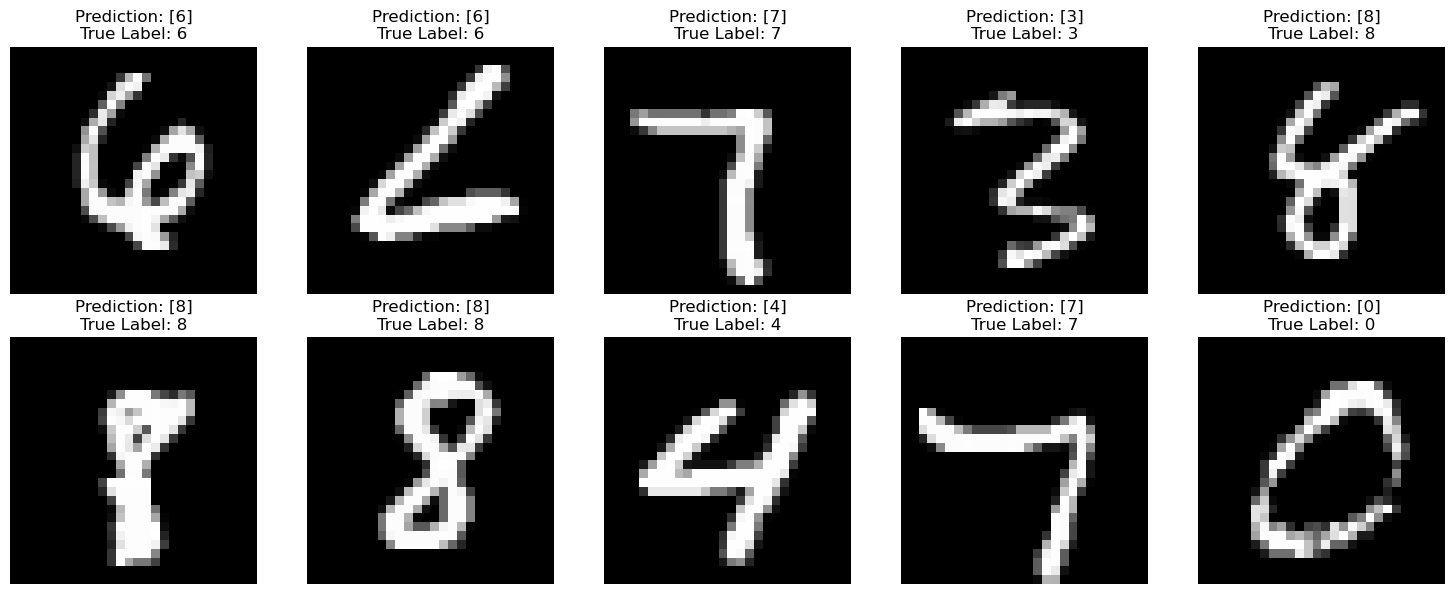

Incorrect Predictions:



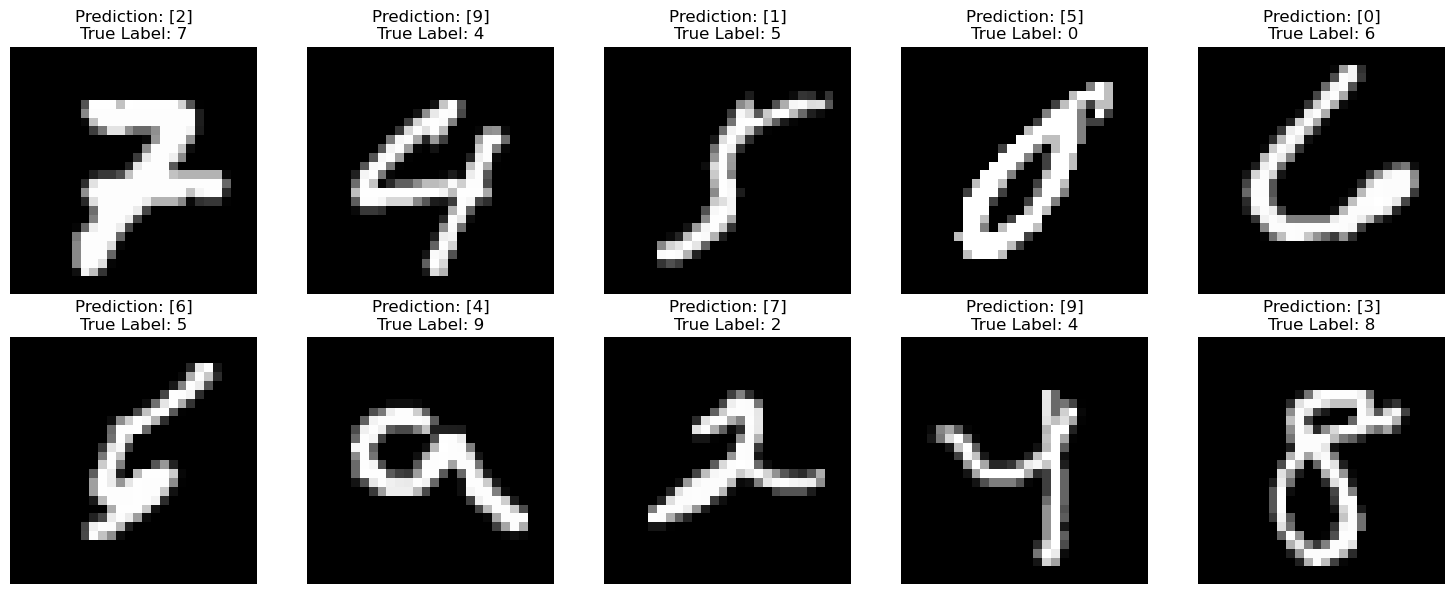

In [8]:
# Run the model with the validation data
validation_predictions = make_predictions(X_validation, W1, b1, W2, b2)
validation_accuracy_percent = get_accuracy(validation_predictions, Y_validation) * 100
print(f'Validation Data Accuracy: {validation_accuracy_percent:.3f}%\n')

# Display 10 random correct predictions
display_predictions(10, W1, b1, W2, b2)

# Display 10 random incorrect predictions
display_predictions(10, W1, b1, W2, b2, display_correct=False)

---
---
<br>

# **Clarifications**
Although not necessary, I believe some topics needed some further explanation. I've included those in this section.
<br>
<br>

---
---
<br>

## **Derivative Vs. Gradient**
These two terms are used everywhere in machine learning. People use them interchangeably (including myself) without any issues, but there technically is a difference.

**Derivative**
Measures how a function changes as its inputs change. The derivative of a loss function with respect to a parameter provides information about the sensitivity of the cost to changes in the parameters. It's useful when you have only one parameter to optimize.

**Gradient**
A generalization of the derivative concept to functions with more than one input. It's a vector that points in the direction of steepest ascent of the loss function, with its magnitude representing the rate of increase in that direction. When we compute gradient descent, we find the gradient and move in the opposite direction (the steepest descent). Gradient is computed by taking the partial derivatives of the loss function with respect to all the parameters.

<br>

<img src="Images/Gradient.jpeg" alt="Gradient" width="1200">

Image source: statisticshowto.com
<br>
<br>

---
<br>

## **Loss Function**
When training a neural network, we don't compute the cost at each step. Furthermore, our code actually doesn't even explicitly calculate the cost at all, it only calculates the derivatives of the loss function with respect to the model's parameters. While we may not explicitly calculate the cost itself, we do calculate something directly derived from the loss function. Therefore, you could say we implicitly calculate the cost.

Although factored out in our calculation of cost, the incorrect classes are, in fact, part of the backpropagation calculation and contribute to the gradient descent calculations. Ideally, the model shouldn't have given any probability to the incorrect classes. However, because it's learning, it did, and it needs to be corrected by adjusting the weights and biases. When training a multi-class classifier, the goal is not only to get the correct class right, but also to get the incorrect classes wrong. This ensures that the model is penalized more for making incorrect predictions, and less for making correct predictions.

If the model predicts a high probability for the correct class (closer to 1), the difference will be small, leading to a smaller gradient and a smaller update to the parameters. Since the model is making correct predictions, we don't want to adjust the weights too much. If the model predicts a low probability for the correct class or a high probability for an incorrect class, the difference will be large, leading to a larger gradient and a larger update to the parameters. Since the model is making incorrect predictions, we want to change the parameters more to correct these errors.

If the model's predicted probability for the correct class increases (i.e. the model is predicting more accurately), then $dZ^{[2]}$ for that class gets smaller (closer to 0) because $dZ^{[2]} = \text{predicted probability} - 1$ Therefore, $dW^{[2]}$ also gets smaller, since it's directly computed using $dZ^{[2]}$. Conversely, if the model's predicted probability for the correct class decreases, then $dZ^{[2]}$ for that class gets larger (closer to 1). As a result, $dW^{[2]}$ gets larger too. To reinforce this, let's consider an example using the same variables in our code. Assume that we have a neural network with 3 classes, and the outputs from the hidden layer ($A^{[1]}$) and the output layer ($A^{[2]}$) are as follows:
$${A^{[1]} = [0.6, 0.4]}$$
$$A^{[2]} = [0.1, 0.2, 0.7]$$

Let's also say that the true label is Class 3, so the one-hot encoded labels ($\text{one_hot_Y}$) would be:
$$\text{one_hot_Y} = [0, 0, 1]$$

Now, we calculate $dZ2$:
$$dZ^{[2]} = A^{[2]} - \text{one_hot_Y}$$
$$= [0.1, 0.2, -0.3]$$

$dZ^{[2]}$ is used to calculate $dW^{[2]}$ in the formula $dW^{[2]} = dZ^{[2]} \cdot A^{[1]T} / m$ during backpropagation. If we have one training example (so $m=1$), this formula simplifies to $dW^{[2]} = dZ^{[2]} \cdot A^{[1]T}$.

Let's calculate $dW^{[2]}$ using the dot product:
$$dW^{[2]} = dZ^{[2]} \cdot A^{[1]T} = [(0.1 \cdot 0.6 + 0.1 \cdot 0.4), (0.2 \cdot 0.6 + 0.2 \cdot 0.4), (-0.3 \cdot 0.6 - 0.3 \cdot 0.4)]$$
$$= [0.06, 0.12, -0.18]$$
<br>
<br>

---
<br>

## **Overestimation and Underestimation**
If the predicted probability of a class in $A^{[2]}$ is higher than the actual label, we can say the model overestimates that class. In our example, the model predicted 0.1 for Class 1 and 0.2 for Class 2, but the actual labels for these classes are 0. Therefore, the model overestimated the probabilities of Class 1 and Class 2. $dW^{[2]}$ will also be high, indicating that we need to push the weights in the direction that reduces the cost. Overestimating can lead to incorrect decisions. For example, in a medical diagnosis algorithm, if the model overestimates the correct class (e.g., predicts a disease that a patient does not have), it may lead to unnecessary medical treatments.

Overestimating can reduce the discriminative power of the model. When the predicted probability for the correct class is too high, it means the model is assigning high confidence to that class. This may result in the model becoming less sensitive to subtle differences between the correct class and other similar classes. This loss of sensitivity may reduce the model's ability to make nuanced distinctions and affect its overall performance.

If the predicted probability of a class in $A^{[2]}$ is lower than the actual label, we can say the model underestimates that class. In our example, the model predicted 0.7 for Class 3, but the actual label for this class is 1. Therefore, the model underestimated the probability of Class 3. $dW^{[2]}$ will also be low, indicating that we need to push the weights in the direction that reduces the cost.
<br>
<br>

---
<br>

## **Calibration**
"True probabilities" refer to the actual frequencies of occurrence of each class within the dataset being modeled. Overestimating can indicate a lack of calibration in the model's predicted probabilities. A well-calibrated model should have predicted probabilities that closely reflect the true probabilities of the classes. A well-calibrated mode is one that provides predicted probabilities that align well with the true probabilities. For example, if the model assigns a predicted probability of $0.8$ to a certain class, it should mean that, on average, this class is expected to occur $80%$ of the time in reality.
<br>
<br>

---
<br>

## **Direction of Weight Adjustments**
The positive values in $dW^{[2]}$ ($0.06$ and $0.12$ in our example) suggest that decreasing the corresponding weights would decrease the cost. The model's predictions for those classes were too low (underestimated) relative to the true labels. Conversely, the negative values in $dW^{[2]}$ ($-0.18$ in our example) suggest that increasing the corresponding weights would decrease the cost.
<br>
<br>

---
---